In [248]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras as ks

In [249]:
dataset = pd.read_csv('sensor.csv')
dataset.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,1/2/2023 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,1/2/2023 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,1/2/2023 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,1/2/2023 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,1/2/2023 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [250]:
# Find NAN
nan_df = dataset[dataset.isna().any(axis=1)]
display(nan_df.head())
dataset = dataset.dropna(how='all')

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious


In [251]:
counts = dataset['Is_Malicious'].value_counts()
counts_filtered = counts.loc[[0, 1]]
print(counts_filtered)

Is_Malicious
0    9513
1     487
Name: count, dtype: int64


In [252]:
dataset.shape

(10000, 21)

In [253]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'dataset' is your DataFrame containing the whole dataset
enc = LabelEncoder()

# Convert 'Timestamp' and 'IP_Address' columns to numeric representation
dataset[[ 'IP_Address']] = \
    dataset[['IP_Address']].apply(enc.fit_transform)

# Convert 'Timestamp' column to UNIX timestamp (seconds)
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp']).astype('int64') // 10**9

# Display the modified DataFrame
print(dataset.head())


   Node_ID   Timestamp  IP_Address  Packet_Rate  Packet_Drop_Rate  \
0        1  1672617600         861    52.018229          2.727317   
1        2  1672617660        5081    59.504648          1.435058   
2        3  1672617720        3510    34.118204          1.320905   
3        4  1672617780        8345    39.643055          1.988791   
4        5  1672617840        5429    40.212679          1.005121   

   Packet_Duplication_Rate  Data_Throughput  Signal_Strength        SNR  \
0                 0.955687       130.967180       -52.059232  23.974265   
1                 1.228460        82.634358       -57.754723  22.572052   
2                 1.015245        61.649928       -52.399037  15.667076   
3                 0.784562        69.704181       -53.727443  20.286962   
4                 1.412193       123.445612       -49.696620  24.318538   

   Battery_Level  ...  Number_of_Neighbors  Route_Request_Frequency  \
0      82.982598  ...                    3                11.32

In [254]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming dataset is a pandas DataFrame
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

# Convert the scaled NumPy array back to a DataFrame with original column names
dataset_scaled_df = pd.DataFrame(dataset_scaled, columns=dataset.columns)
dataset_scaled_df.head()



,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,0.0000,0.000000,0.093202,0.370660,0.421887,0.483303,0.726891,0.387964,0.654562,0.588587,...,0.357143,0.438084,0.364206,0.538487,0.360808,0.258052,0.296612,0.399257,0.362036,0.0
1,0.0001,0.000004,0.550011,0.446889,0.240218,0.660597,0.432764,0.261806,0.621356,0.403047,...,0.571429,0.290589,0.252353,0.376536,0.358555,0.157552,0.390018,0.505119,0.606860,0.0
2,0.0002,0.000008,0.379952,0.188397,0.224170,0.522014,0.305064,0.380438,0.457839,0.492789,...,0.500000,0.286667,0.230932,0.500502,0.275840,0.081752,0.541996,0.451933,0.641372,0.0
3,0.0003,0.000011,0.903334,0.244653,0.318063,0.372078,0.354078,0.351013,0.567243,0.516964,...,0.571429,0.407125,0.154018,0.397869,0.180935,0.191066,0.521447,0.574054,0.679332,0.0
4,0.0004,0.000015,0.587681,0.250453,0.179776,0.780017,0.681119,0.440298,0.662715,0.605663,...,0.642857,0.431003,0.328383,0.272133,0.222654,0.131454,0.372950,0.344322,0.326941,0.0


In [255]:
from imblearn.over_sampling import SMOTE
X = dataset_scaled_df.drop(columns=['Is_Malicious'])  # Features
y = dataset_scaled_df['Is_Malicious']  # Target

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now, X_resampled and y_resampled contain the resampled data

In [256]:
from collections import Counter
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(y_resampled))

Before SMOTE : Counter({0.0: 9513, 1.0: 487})
After SMOTE : Counter({0.0: 9513, 1.0: 9513})


In [257]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the original dataset into training and testing datasets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5)

array([[<Axes: title={'center': 'Node_ID'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'IP_Address'}>,
        <Axes: title={'center': 'Packet_Rate'}>,
        <Axes: title={'center': 'Packet_Drop_Rate'}>],
       [<Axes: title={'center': 'Packet_Duplication_Rate'}>,
        <Axes: title={'center': 'Data_Throughput'}>,
        <Axes: title={'center': 'Signal_Strength'}>,
        <Axes: title={'center': 'SNR'}>,
        <Axes: title={'center': 'Battery_Level'}>],
       [<Axes: title={'center': 'Energy_Consumption_Rate'}>,
        <Axes: title={'center': 'Number_of_Neighbors'}>,
        <Axes: title={'center': 'Route_Request_Frequency'}>,
        <Axes: title={'center': 'Route_Reply_Frequency'}>,
        <Axes: title={'center': 'Data_Transmission_Frequency'}>],
       [<Axes: title={'center': 'Data_Reception_Frequency'}>,
        <Axes: title={'center': 'Error_Rate'}>,
        <Axes: title={'center': 'CPU_Usage'}>,
        <Axes: title={'center': 'Me

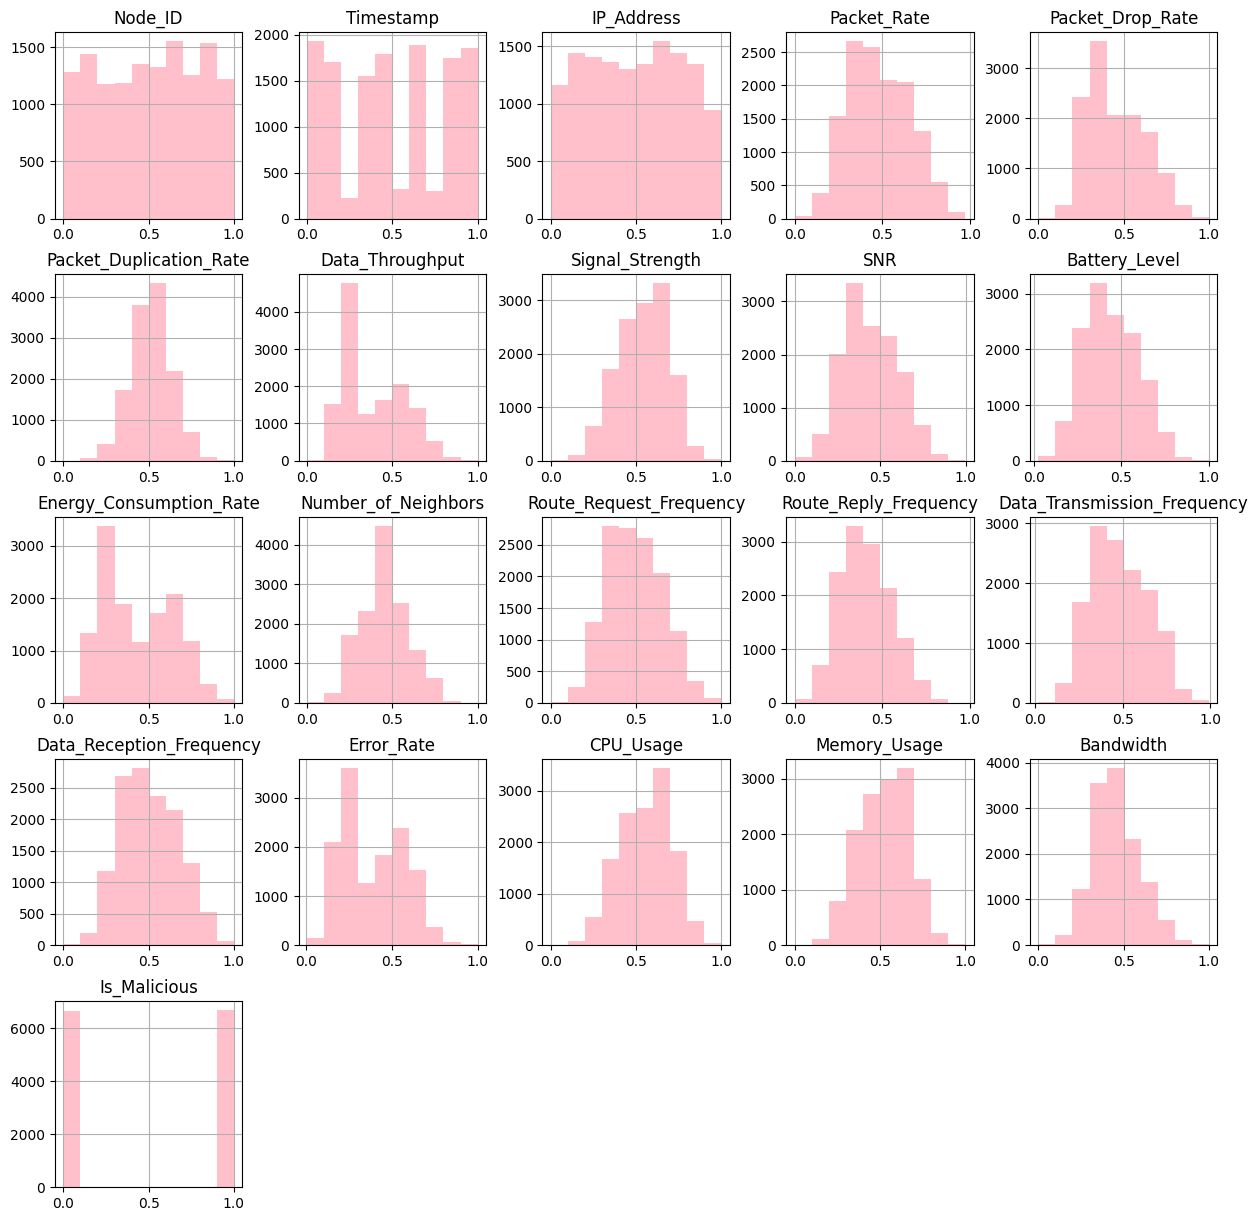

In [258]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15,15),color='pink')

array([[<Axes: title={'center': 'Node_ID'}>,
        <Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'IP_Address'}>,
        <Axes: title={'center': 'Packet_Rate'}>,
        <Axes: title={'center': 'Packet_Drop_Rate'}>],
       [<Axes: title={'center': 'Packet_Duplication_Rate'}>,
        <Axes: title={'center': 'Data_Throughput'}>,
        <Axes: title={'center': 'Signal_Strength'}>,
        <Axes: title={'center': 'SNR'}>,
        <Axes: title={'center': 'Battery_Level'}>],
       [<Axes: title={'center': 'Energy_Consumption_Rate'}>,
        <Axes: title={'center': 'Number_of_Neighbors'}>,
        <Axes: title={'center': 'Route_Request_Frequency'}>,
        <Axes: title={'center': 'Route_Reply_Frequency'}>,
        <Axes: title={'center': 'Data_Transmission_Frequency'}>],
       [<Axes: title={'center': 'Data_Reception_Frequency'}>,
        <Axes: title={'center': 'Error_Rate'}>,
        <Axes: title={'center': 'CPU_Usage'}>,
        <Axes: title={'center': 'Me

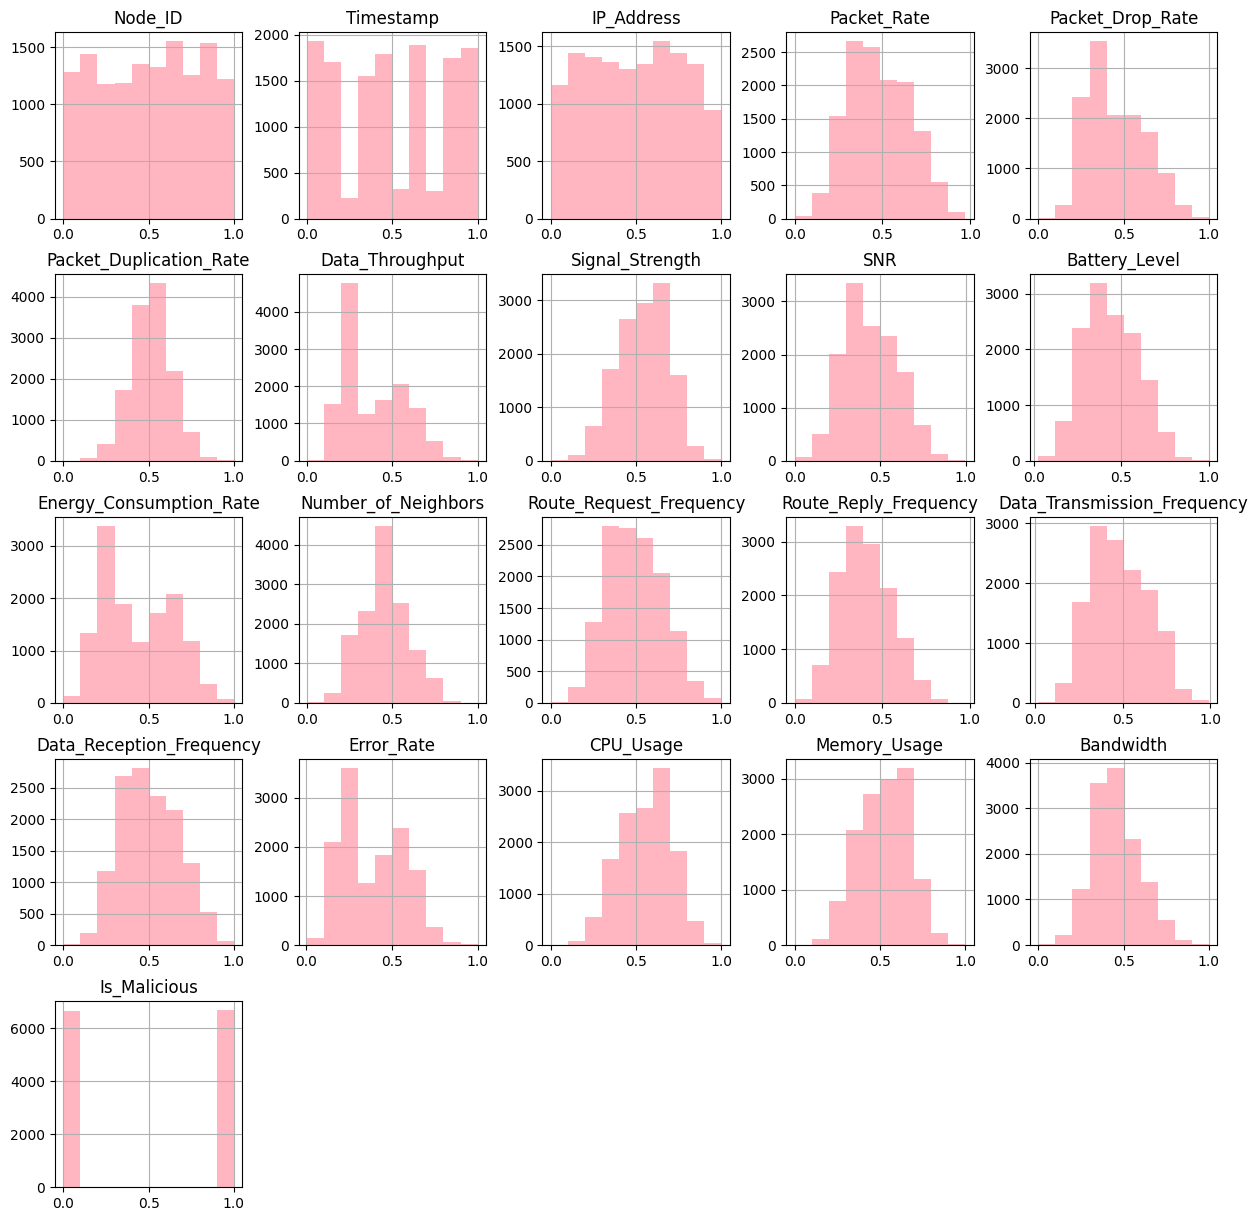

In [259]:
old_data = X_train.join(y_train)
old_data.hist(figsize=(15,15), color='lightpink')

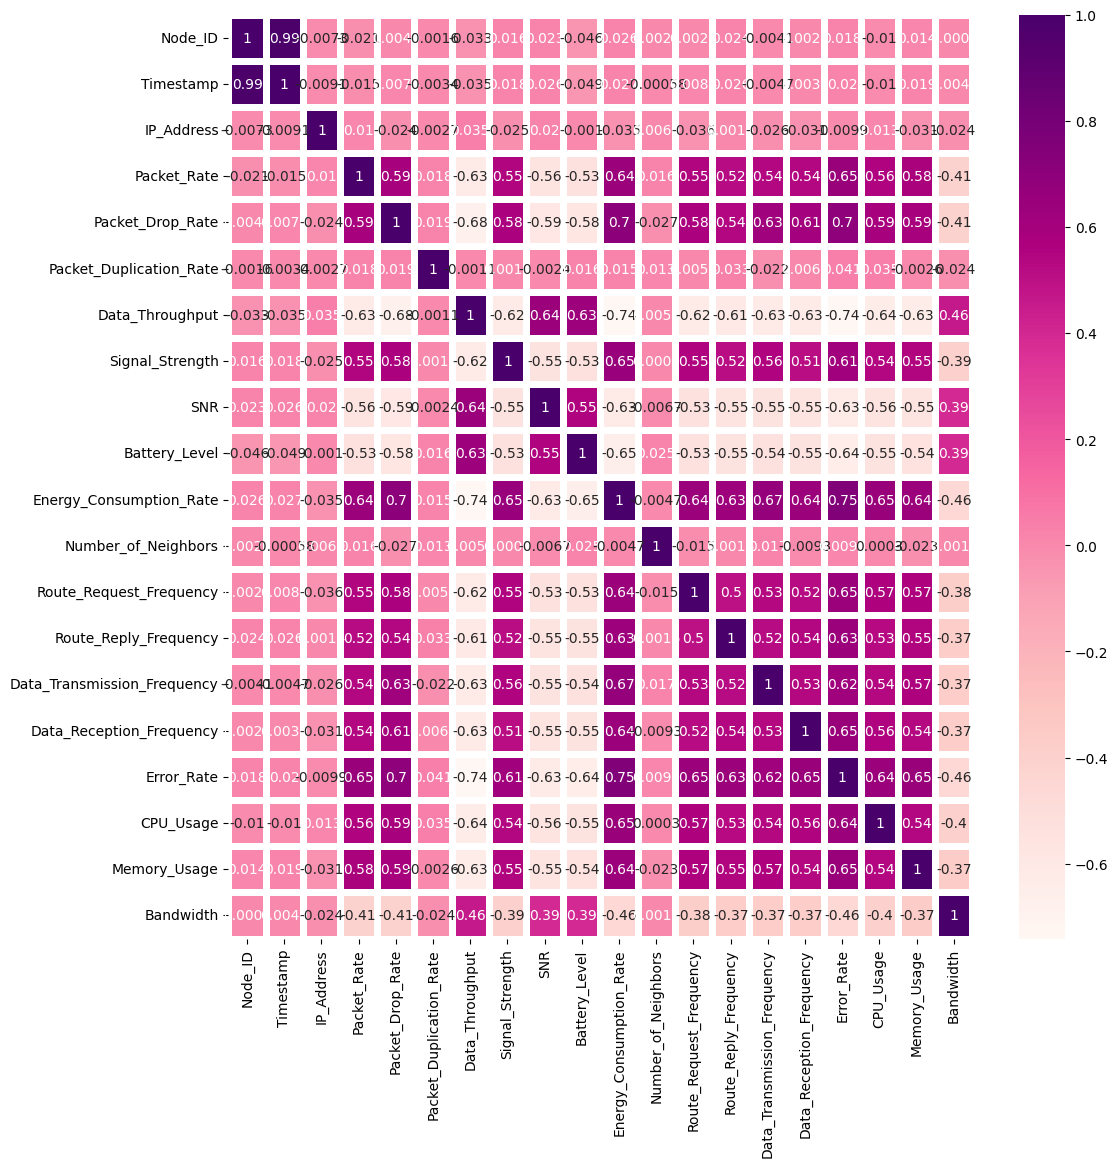

In [260]:
import seaborn as sns
#Using Pearson Correlation
X_resampled = pd.DataFrame(X_resampled)
plt.figure(figsize=(12,12))
cor = X_resampled.corr()
sns.heatmap(cor, annot=True, cmap='RdPu',linewidths=5)
plt.show()

In [261]:
from scipy.stats import pearsonr
# Select two columns from the dataset to calculate correlation
output_column = 'Is_Malicious'
correlation_results = {}
for column in dataset_scaled_df.columns:
    if column != output_column:
        # Check for NaN values and handle them
        mask = ~np.isnan(dataset_scaled_df[column]) & ~np.isnan(dataset_scaled_df[output_column])
        correlation_coefficient, _ = pearsonr(dataset_scaled_df[column][mask], dataset_scaled_df[output_column][mask])
        correlation_results[column] = correlation_coefficient

# Sort the results by correlation coefficient in descending order
sorted_correlation_results = sorted(correlation_results.items(), key=lambda x: x[1], reverse=True)

# Print the results
for column, correlation_coefficient in sorted_correlation_results:
    print(f"Correlation between {column} and {output_column}: {correlation_coefficient}")

Correlation between Error_Rate and Is_Malicious: 0.7105457053586416
Correlation between Energy_Consumption_Rate and Is_Malicious: 0.7025543933388563
Correlation between Packet_Drop_Rate and Is_Malicious: 0.6036342936951667
Correlation between Packet_Rate and Is_Malicious: 0.4670940481992475
Correlation between Data_Transmission_Frequency and Is_Malicious: 0.4637703911830783
Correlation between Data_Reception_Frequency and Is_Malicious: 0.4597602320057451
Correlation between Route_Reply_Frequency and Is_Malicious: 0.45688211390726197
Correlation between Route_Request_Frequency and Is_Malicious: 0.4557357220284799
Correlation between Memory_Usage and Is_Malicious: 0.4026946152750799
Correlation between CPU_Usage and Is_Malicious: 0.4015687748080689
Correlation between Signal_Strength and Is_Malicious: 0.38386363780343946
Correlation between Timestamp and Is_Malicious: 0.01061063914188807
Correlation between Packet_Duplication_Rate and Is_Malicious: 0.010230354722061298
Correlation betwee

In [262]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset_scaled_df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset_scaled_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [263]:
corr_features = correlation(X_train, 0.65)
len(set(corr_features))

6

In [264]:
corr_features

{'Data_Throughput',
 'Data_Transmission_Frequency',
 'Energy_Consumption_Rate',
 'Error_Rate',
 'Memory_Usage',
 'Timestamp'}

In [265]:
import pandas as pd

# Convert X_val_smote to a pandas DataFrame
X_val= pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)
# Drop correlated features from X_val_smote
X_val = X_val.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)
# Convert the modified DataFrame back to a NumPy array if needed
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.drop(corr_features, axis=1)
X_train = X_train.to_numpy()

In [266]:
X_train.shape

(13318, 14)

In [267]:
X_test.shape

(2854, 14)

In [268]:
X_val.shape

(2854, 14)

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train, y_train)
linear_train_preds = linear_model.predict(X_train)
mean_absolute_error(linear_train_preds, y_train)
#The closer MAE is to 0, the more accurate the model is

0.11284411935171866

In [270]:
linear_model.score(X_val,y_val)

0.9208487811489258

In [271]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Round the predictions to get binary classes
y_pred = linear_model.predict(X_test)
y_pred_rounded = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)
print("Accuracy:", accuracy)
# Calculate recall
recall = recall_score(y_test, y_pred_rounded, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred_rounded, average='weighted')
print("Precision:", precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_rounded, average='weighted')
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred_rounded)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rounded)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9996496145760336
Recall: 0.9996496145760336
Precision: 0.9996498568896047
F1 Score: 0.9996496129841445
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1445
         1.0       1.00      1.00      1.00      1409

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854

Confusion Matrix:
 [[1445    0]
 [   1 1408]]


In [272]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [273]:
forest.score(X_val,y_val)

0.9919751538123057

Accuracy: 0.9978976874562018
Precision: 0.9978987027803092
Recall: 0.9978976874562018
F1 Score: 0.9978977050095471
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1445
         1.0       1.00      1.00      1.00      1409

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



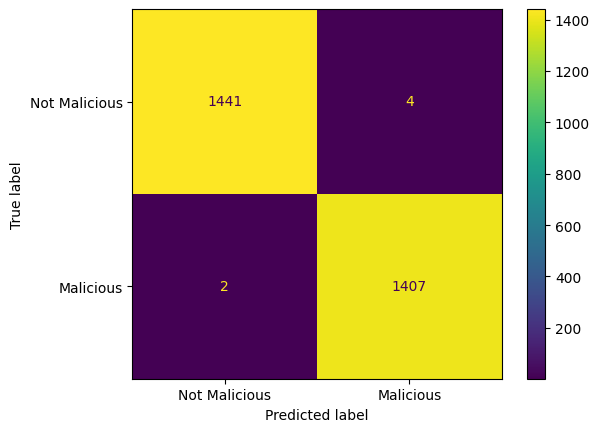

In [274]:
y_pred = forest.predict(X_test)
y_pred_labels = np.round(y_pred)
# Convert predicted probabilities to class labels
#y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred contains predicted probabilities for each class
# Calculate accuracy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,y_pred_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)


In [275]:
#Cross-Validation
from sklearn.model_selection import GridSearchCV
param_grid = {
   "n_estimators": [100,  50],
   "min_samples_split": [2, 4],
   "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 50]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [276]:
best_forest = grid_search.best_estimator_

In [277]:
best_forest.score(X_val,y_val)

0.9953450145561837

Accuracy: 0.9989488437281009
Precision: 0.9989490980795167
Recall: 0.9989488437281009
F1 Score: 0.9989488482455442
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1445
         1.0       1.00      1.00      1.00      1409

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



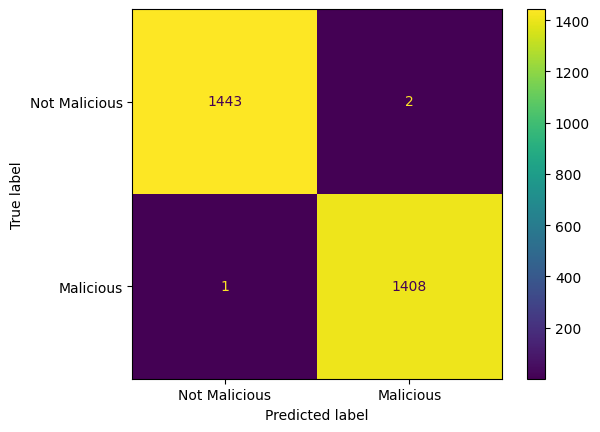

In [278]:
y_pred = best_forest.predict(X_test)
y_pred_labels = np.round(y_pred)
# Convert predicted probabilities to class labels
#y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred contains predicted probabilities for each class
# Calculate accuracy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,y_pred_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)

In [279]:
#ANN
import keras
from keras import layers

model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(14,), activation='relu'),  # Note the comma after 12 to make it a tuple
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
]) 

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 
x = np.column_stack((X_train, y_train))
y = y_train.values
 
model.fit(X_train, y_train, epochs=10, batch_size=8)
x = np.column_stack((X_test, y_test))
y = y_test
model.evaluate(x=X_test, y=y_test, batch_size=8)

Epoch 1/10
1665/1665 [==============================] - 3s 1ms/step - loss: 0.0442 - accuracy: 0.9857
Epoch 2/10
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0050 - accuracy: 0.9981
Epoch 3/10
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 4/10
1665/1665 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 5/10
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0029 - accuracy: 0.9989
Epoch 6/10
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0035 - accuracy: 0.9991
Epoch 7/10
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 0.9992
Epoch 8/10
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0035 - accuracy: 0.9986
Epoch 9/10
1665/1665 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 0.9987
Epoch 10/10
357/357 [==============================] - 1s 1ms/step - loss: 0.0016 

[0.0016053867293521762, 0.9992992281913757]

90/90 [==============================] - 0s 1ms/step
Accuracy: 0.9996496145760336
Precision: 0.9996498568896047
Recall: 0.9996496145760336
F1 Score: 0.9996496129841445
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1445
         1.0       1.00      1.00      1.00      1409

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



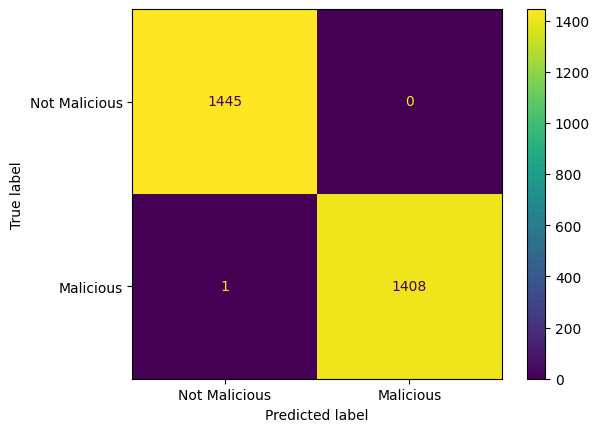

In [280]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred contains predicted probabilities for each class
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred_labels)
print("Classification Report:\n", class_report)

In [290]:
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier(max_depth=3,random_state=0,min_samples_split=15,min_samples_leaf=35,max_leaf_nodes=6,max_features="log2")
clf_DT = clf_DT.fit(X_train,y_train)

[Text(0.5909090909090909, 0.875, 'x[6] <= 0.44\ngini = 0.5\nsamples = 13318\nvalue = [6632.0, 6686.0]'),
 Text(0.36363636363636365, 0.625, 'x[6] <= 0.377\ngini = 0.248\nsamples = 7083\nvalue = [1025, 6058]'),
 Text(0.18181818181818182, 0.375, 'x[12] <= 0.468\ngini = 0.14\nsamples = 5272\nvalue = [400, 4872]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.396\nsamples = 324\nvalue = [236, 88]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.064\nsamples = 4948\nvalue = [164, 4784]'),
 Text(0.5454545454545454, 0.375, 'x[12] <= 0.551\ngini = 0.452\nsamples = 1811\nvalue = [625, 1186]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.288\nsamples = 636\nvalue = [525, 111]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.156\nsamples = 1175\nvalue = [100, 1075]'),
 Text(0.8181818181818182, 0.625, 'x[9] <= 0.552\ngini = 0.181\nsamples = 6235\nvalue = [5607, 628]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.05\nsamples = 5564\nvalue = [5421, 143]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.401\nsamp

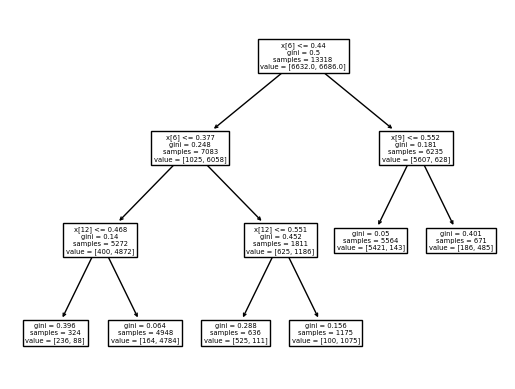

In [291]:
tree.plot_tree(clf_DT)

In [292]:
from sklearn import svm
h1=svm.LinearSVC(C=1)
h1.fit(X_train,y_train)
h1.score(X_val,y_val)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.9982480728801681

Accuracy: 0.9996496145760336
Precision: 0.9996498568896047
Recall: 0.9996496145760336
F1 Score: 0.9996496129841445
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1445
         1.0       1.00      1.00      1.00      1409

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



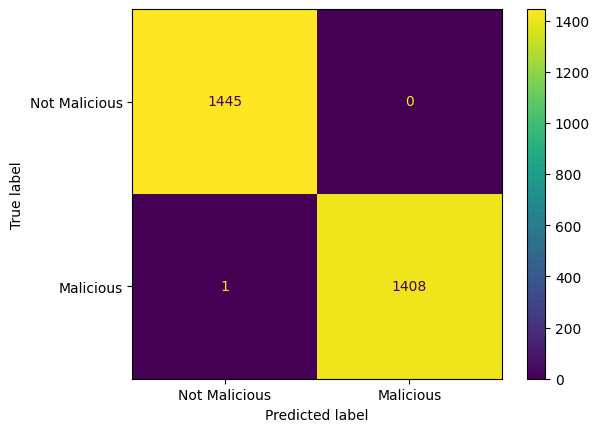

In [293]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = h1.predict(X_test)
y_pred = np.round(y_pred)
# Convert predicted probabilities to class labels
y_pred_labels = y_pred # Assuming y_pred contains predicted probabilities for each class
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Malicious', 'Malicious'])
disp.plot()
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify the average parameter for multiclass or multilabel classification
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [294]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold

# Create an instance of LinearSVC
h1 = svm.LinearSVC(C=1)

# Define the number of splits for k-fold cross-validation
k_folds = 5
kfold = KFold(n_splits=k_folds)

# Perform k-fold cross-validation
scores = cross_val_score(h1, X_train, y_train, cv=kfold)

# Print cross-validation scores
print("Cross Validation Scores:", scores)

# Print average cross-validation score
print("Average CV Score:", scores.mean())

# Print number of CV scores used in average
print("Number of CV Scores used in Average:", len(scores))


Cross Validation Scores: [0.9984985  0.99962462 1.         0.99924897 1.        ]
Average CV Score: 0.9994744180906403
Number of CV Scores used in Average: 5


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dua